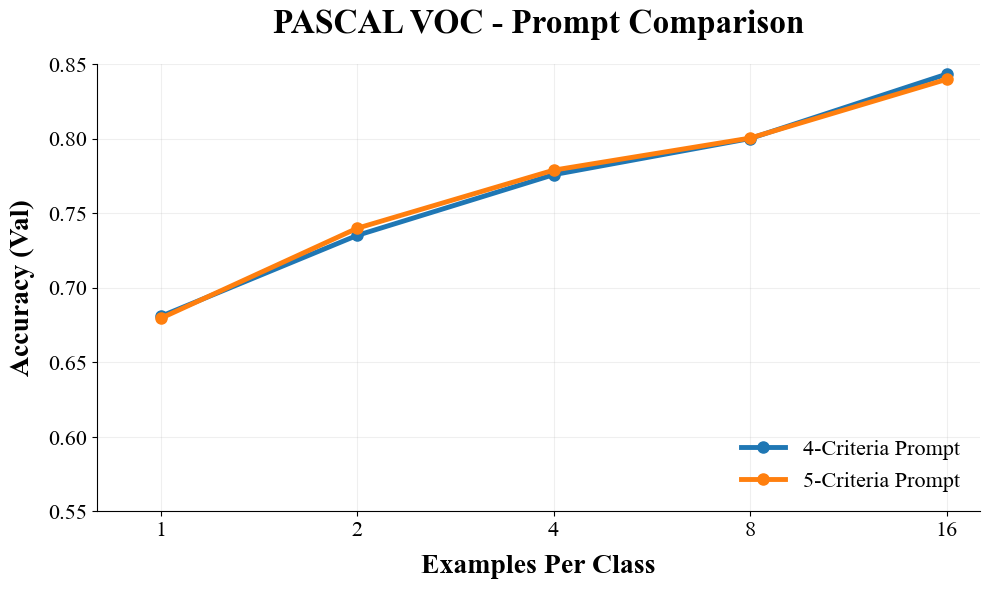

Percentage difference (5-criteria vs 4-criteria):
Examples per class: 1
  4-criteria accuracy: 0.6807
  5-criteria accuracy: 0.6794
  Difference: -0.20%

Examples per class: 2
  4-criteria accuracy: 0.7350
  5-criteria accuracy: 0.7398
  Difference: 0.65%

Examples per class: 4
  4-criteria accuracy: 0.7757
  5-criteria accuracy: 0.7788
  Difference: 0.39%

Examples per class: 8
  4-criteria accuracy: 0.8000
  5-criteria accuracy: 0.8003
  Difference: 0.04%

Examples per class: 16
  4-criteria accuracy: 0.8432
  5-criteria accuracy: 0.8397
  Difference: -0.41%



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np
import re

# Constants
BASE_FOLDER = '/Users/andrew/Thesis/smart-image-augmentation/results/experiment-with-prompts'
PROMPT_FOLDERS = ['prompt-4-criterias', 'prompt-5-criterias']
METHODS = {
    'prompt-4-criterias': '4-Criteria Prompt',
    'prompt-5-criterias': '5-Criteria Prompt'
}

def extract_examples_per_class(filename):
    # Use regex to find the number after 'pascal-0-' and before the next dash
    match = re.search(r'pascal-0-(\d+)-', filename)
    if match:
        return int(match.group(1))
    else:
        print(f"Warning: Could not extract examples_per_class from {filename}")
        return None

def load_and_process_data(folder):
    all_files = glob.glob(os.path.join(folder, "*.csv"))
    if not all_files:
        print(f"No CSV files found in {folder}")
        return None
    
    df_list = []
    for filename in all_files:
        df = pd.read_csv(filename)
        examples_per_class = extract_examples_per_class(os.path.basename(filename))
        if examples_per_class is not None:
            df['examples_per_class'] = examples_per_class
            df_list.append(df)
    
    if not df_list:
        print(f"No valid data found in {folder}")
        return None
    
    combined_df = pd.concat(df_list, ignore_index=True)
    
    filtered_df = combined_df[(combined_df['metric'] == 'Accuracy') & 
                              (combined_df['split'] == 'Validation')]
    
    results = filtered_df.groupby('examples_per_class')['value'].max().reset_index()
    results['method'] = METHODS[os.path.basename(folder)]
    
    return results

def plot_pascal_results(results_4, results_5):
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    
    color_palette = ['#1f77b4', '#ff7f0e']
    
    plt.plot(results_4['examples_per_class'], results_4['value'], marker='o', linewidth=3.5, 
             color=color_palette[0], label=METHODS['prompt-4-criterias'], markersize=8)
    plt.plot(results_5['examples_per_class'], results_5['value'], marker='o', linewidth=3.5, 
             color=color_palette[1], label=METHODS['prompt-5-criterias'], markersize=8)
    
    plt.title('PASCAL VOC - Prompt Comparison', fontsize=24, fontweight='bold', y=1.05)
    plt.xlabel('Examples Per Class', fontsize=20, fontweight='bold', labelpad=10)
    plt.ylabel('Accuracy (Val)', fontsize=20, fontweight='bold', labelpad=10)
    plt.xscale('log', base=2)
    plt.xticks([1, 2, 4, 8, 16], ['1', '2', '4', '8', '16'], fontsize=16)
    plt.yticks(np.arange(0.55, 0.86, 0.05), fontsize=16)
    
    plt.ylim(0.55, 0.85)
    plt.xlim(0.8, 18)
    
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.legend(fontsize=16, loc='lower right', frameon=False)
    
    plt.tight_layout()
    plt.savefig('pascal_prompt_comparison.png', dpi=300, bbox_inches='tight')
    plt.savefig('pascal_prompt_comparison.pdf', bbox_inches='tight')
    plt.show()

def calculate_percentage_difference(results_4, results_5):
    merged = pd.merge(results_4, results_5, on='examples_per_class', suffixes=('_4', '_5'))
    merged['percentage_diff'] = (merged['value_5'] - merged['value_4']) / merged['value_4'] * 100
    
    print("Percentage difference (5-criteria vs 4-criteria):")
    for _, row in merged.iterrows():
        print(f"Examples per class: {row['examples_per_class']}")
        print(f"  4-criteria accuracy: {row['value_4']:.4f}")
        print(f"  5-criteria accuracy: {row['value_5']:.4f}")
        print(f"  Difference: {row['percentage_diff']:.2f}%")
        print()

# Main execution
results_4 = load_and_process_data(os.path.join(BASE_FOLDER, 'prompt-4-criterias'))
results_5 = load_and_process_data(os.path.join(BASE_FOLDER, 'prompt-5-criterias'))

if results_4 is not None and results_5 is not None:
    plot_pascal_results(results_4, results_5)
    calculate_percentage_difference(results_4, results_5)
else:
    print("Error: Could not load data for one or both prompt strategies.")

In [7]:
(0.65 + 0.39 + 0.04 - 0.41 - 0.20)

0.47000000000000014